In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.feature_selection import SelectFromModel, SelectKBest, SelectPercentile, RFE
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pandas.api.types import is_numeric_dtype
from sklearn.linear_model import Ridge, Lasso
import matplotlib.pyplot as plt

In [42]:
properti_price = pd.read_csv('/Users/saktiyoga/Downloads/UTS_PMDPM/Dataset UTS_Gasal 2425.csv')
properti_price.head(100)

,squaremeters,numberofrooms,hasyard,haspool,floors,citycode,citypartrange,numprevowners,made,isnewbuilt,hasstormprotector,basement,attic,garage,hasstorageroom,hasguestroom,price,category
0,75523,3,no,yes,63,9373,3,8,2005,old,yes,4313,9005,956,no,7,7559081.5,Luxury
1,55712,58,no,yes,19,34457,6,8,2021,old,no,2937,8852,135,yes,9,5574642.1,Middle
2,86929,100,yes,no,11,98155,3,4,2003,new,no,6326,4748,654,no,10,8696869.3,Luxury
3,51522,3,no,no,61,9047,8,3,2012,new,yes,632,5792,807,yes,5,5154055.2,Middle
4,96470,74,yes,no,21,92029,4,2,2011,new,yes,5414,1172,716,yes,9,9652258.1,Luxury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,98868,41,no,yes,67,85917,7,3,2021,new,yes,2146,1077,623,yes,3,9892300.1,Luxury
96,83110,43,yes,no,75,55046,7,10,2001,new,no,4108,5663,380,yes,7,8321631.1,Luxury
97,71154,67,no,yes,53,8762,2,6,2021,new,yes,8418,7187,706,no,8,7122699.1,Luxury
98,90841,48,yes,no,15,25300,6,5,2003,old,no,3333,149,842,no,9,9086177.3,Luxury


In [43]:
properti_price2 = properti_price.drop('category', axis=1)
properti_price2.head(100)

,squaremeters,numberofrooms,hasyard,haspool,floors,citycode,citypartrange,numprevowners,made,isnewbuilt,hasstormprotector,basement,attic,garage,hasstorageroom,hasguestroom,price
0,75523,3,no,yes,63,9373,3,8,2005,old,yes,4313,9005,956,no,7,7559081.5
1,55712,58,no,yes,19,34457,6,8,2021,old,no,2937,8852,135,yes,9,5574642.1
2,86929,100,yes,no,11,98155,3,4,2003,new,no,6326,4748,654,no,10,8696869.3
3,51522,3,no,no,61,9047,8,3,2012,new,yes,632,5792,807,yes,5,5154055.2
4,96470,74,yes,no,21,92029,4,2,2011,new,yes,5414,1172,716,yes,9,9652258.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,98868,41,no,yes,67,85917,7,3,2021,new,yes,2146,1077,623,yes,3,9892300.1
96,83110,43,yes,no,75,55046,7,10,2001,new,no,4108,5663,380,yes,7,8321631.1
97,71154,67,no,yes,53,8762,2,6,2021,new,yes,8418,7187,706,no,8,7122699.1
98,90841,48,yes,no,15,25300,6,5,2003,old,no,3333,149,842,no,9,9086177.3


In [44]:
properti_price2.info

<bound method DataFrame.info of       squaremeters  numberofrooms hasyard haspool  floors  citycode  \
0            75523              3      no     yes      63      9373   
1            55712             58      no     yes      19     34457   
2            86929            100     yes      no      11     98155   
3            51522              3      no      no      61      9047   
4            96470             74     yes      no      21     92029   
...            ...            ...     ...     ...     ...       ...   
9995           341             83      no      no       8      1960   
9996         21514              5      no     yes      11     91373   
9997          1726             89      no     yes       5     73133   
9998         44403             29     yes     yes      12     34606   
9999          1440             84      no      no      49     18412   

      citypartrange  numprevowners  made isnewbuilt hasstormprotector  \
0                 3              8  2005  

In [45]:
properti_price2.describe()

,squaremeters,numberofrooms,floors,citycode,citypartrange,numprevowners,made,basement,attic,garage,hasguestroom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.00000,10000.00000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,50.276300,50225.486100,5.510100,5.521700,2005.48850,5033.103900,5028.01060,553.12120,4.99460,4.993448e+06
std,28774.37535,28.816696,28.889171,29006.675799,2.872024,2.856667,9.30809,2876.729545,2894.33221,262.05017,3.17641,2.877424e+06
min,89.00000,1.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,1.00000,100.00000,0.00000,1.031350e+04
25%,25098.50000,25.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,2559.750000,2512.00000,327.75000,2.00000,2.516402e+06
50%,50105.50000,50.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,5092.500000,5045.00000,554.00000,5.00000,5.016180e+06
75%,74609.75000,75.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,7511.250000,7540.50000,777.25000,8.00000,7.469092e+06
max,99999.00000,100.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,10000.000000,10000.00000,1000.00000,10.00000,1.000677e+07


In [46]:
print(properti_price2['price'].value_counts())

price
7559081.5    1
2600292.1    1
3804577.4    1
3658559.7    1
2316639.4    1
            ..
5555606.6    1
5501007.5    1
9986201.2    1
9104801.8    1
146708.4     1
Name: count, Length: 10000, dtype: int64


In [47]:
print("data null \n", properti_price2.isnull().sum())
print("data kosong \n", properti_price2.empty)
print("data nan \n", properti_price2.isna().sum())

data null 
 squaremeters         0
numberofrooms        0
hasyard              0
haspool              0
floors               0
citycode             0
citypartrange        0
numprevowners        0
made                 0
isnewbuilt           0
hasstormprotector    0
basement             0
attic                0
garage               0
hasstorageroom       0
hasguestroom         0
price                0
dtype: int64
data kosong 
 False
data nan 
 squaremeters         0
numberofrooms        0
hasyard              0
haspool              0
floors               0
citycode             0
citypartrange        0
numprevowners        0
made                 0
isnewbuilt           0
hasstormprotector    0
basement             0
attic                0
garage               0
hasstorageroom       0
hasguestroom         0
price                0
dtype: int64


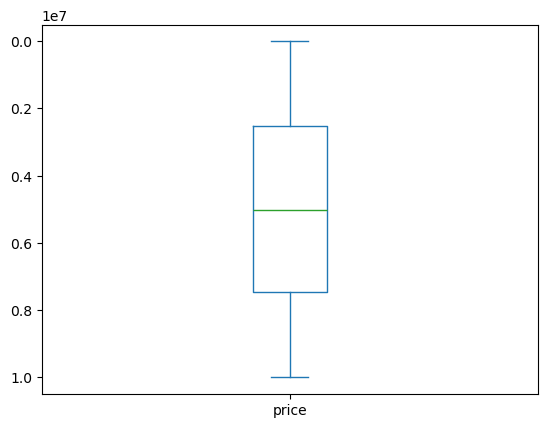

In [48]:
properti_price2.price.plot(kind='box')
plt.gca().invert_yaxis()
plt.show()

Jumlah baris DataFrame sebelum di outlier 10000
Jumlah baris DataFrame sesudah di outlier 10000


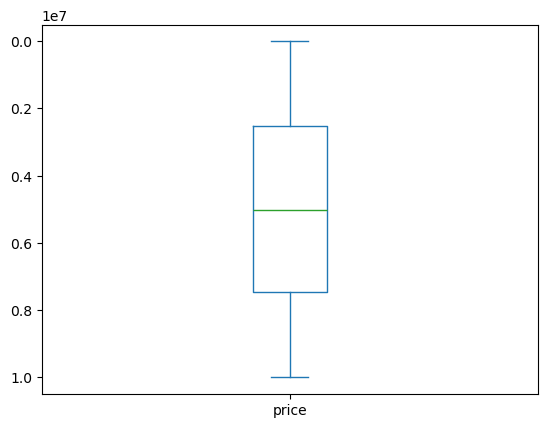

In [49]:
def remove_outlier(df_in):
  for col_name in list(df_in):
    if is_numeric_dtype(df_in[col_name]):
      q1 = df_in[col_name].quantile(0.25)
      q3 = df_in[col_name].quantile(0.75)

      iqr = q3-q1
      batas_atas = q3+(iqr*1.5)
      batas_bawah = q1-(iqr*1.5)

      df_out = df_in.loc[(df_in[col_name]>=batas_bawah) & (df_in[col_name]<=batas_atas)]

  return df_out

properti_price_clean = remove_outlier(properti_price2)
print("Jumlah baris DataFrame sebelum di outlier",properti_price2.shape[0])
print("Jumlah baris DataFrame sesudah di outlier",properti_price_clean.shape[0])
properti_price_clean.price.plot(kind='box', vert=True)

plt.gca().invert_yaxis()
plt.show()

In [50]:
print("data null \n", properti_price_clean.isnull().sum())
print("data kosong \n", properti_price_clean.empty)
print("data nan \n", properti_price_clean.isna().sum())

data null 
 squaremeters         0
numberofrooms        0
hasyard              0
haspool              0
floors               0
citycode             0
citypartrange        0
numprevowners        0
made                 0
isnewbuilt           0
hasstormprotector    0
basement             0
attic                0
garage               0
hasstorageroom       0
hasguestroom         0
price                0
dtype: int64
data kosong 
 False
data nan 
 squaremeters         0
numberofrooms        0
hasyard              0
haspool              0
floors               0
citycode             0
citypartrange        0
numprevowners        0
made                 0
isnewbuilt           0
hasstormprotector    0
basement             0
attic                0
garage               0
hasstorageroom       0
hasguestroom         0
price                0
dtype: int64


In [51]:
X_regress=properti_price_clean.drop('price',axis=1)
y_regress=properti_price_clean.price

X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(X_regress, y_regress, test_size=0.20, random_state=84)

In [52]:
X_regress=properti_price_clean.drop('price',axis=1)
y_regress=properti_price_clean.price

X_train_ins, X_test_ins, y_train_ins, y_test_ins = train_test_split(X_regress, y_regress, test_size=0.20, random_state=84)
cat_cols = X_train_ins.select_dtypes(include=['object']).columns.tolist()
print("Kolom kategorik:",cat_cols)

transformer = make_column_transformer(
    (OneHotEncoder(), cat_cols),
    remainder = 'passthrough'
)

X_train_enc = transformer.fit_transform(X_train_ins)
X_test_enc = transformer.transform(X_test_ins)

df_train_enc = pd.DataFrame (X_train_enc, columns=transformer.get_feature_names_out())
df_test_enc = pd.DataFrame (X_test_enc, columns=transformer.get_feature_names_out())

df_train_enc.head(10)
df_test_enc.head(10)

Kolom kategorik: ['hasyard', 'haspool', 'isnewbuilt', 'hasstormprotector', 'hasstorageroom']


,onehotencoder__hasyard_no,onehotencoder__hasyard_yes,onehotencoder__haspool_no,onehotencoder__haspool_yes,onehotencoder__isnewbuilt_new,onehotencoder__isnewbuilt_old,onehotencoder__hasstormprotector_no,onehotencoder__hasstormprotector_yes,onehotencoder__hasstorageroom_no,onehotencoder__hasstorageroom_yes,...,remainder__numberofrooms,remainder__floors,remainder__citycode,remainder__citypartrange,remainder__numprevowners,remainder__made,remainder__basement,remainder__attic,remainder__garage,remainder__hasguestroom
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,97.0,45.0,62899.0,1.0,9.0,1990.0,4110.0,1675.0,599.0,4.0
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,76.0,54.0,82737.0,7.0,3.0,1998.0,4010.0,8343.0,260.0,10.0
2,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,72.0,26.0,7812.0,6.0,3.0,1995.0,6972.0,3804.0,828.0,8.0
3,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,46.0,51.0,91317.0,5.0,3.0,2020.0,3337.0,7250.0,337.0,1.0
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,4.0,30.0,8424.0,4.0,10.0,2003.0,5655.0,1684.0,453.0,8.0
5,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,47.0,14.0,50927.0,9.0,6.0,1993.0,4078.0,315.0,767.0,10.0
6,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,54.0,15.0,61691.0,2.0,2.0,2002.0,5925.0,9705.0,342.0,8.0
7,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,42.0,50.0,50833.0,3.0,8.0,2009.0,9320.0,5752.0,936.0,3.0
8,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,97.0,3.0,68804.0,10.0,5.0,1991.0,5804.0,2070.0,846.0,9.0
9,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,18.0,26.0,67302.0,6.0,2.0,2005.0,6111.0,771.0,500.0,10.0


In [53]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error

pipe_Lasso_KBest = Pipeline(steps=[
            ('scale', StandardScaler()),
            ('feature_selection', SelectKBest(score_func=f_regression)),
            ('reg', Lasso(max_iter=1000)) #max_iter digunakan untuk menen
            ])

param_grid_Lasso_KBest = {
    'reg__alpha': [0.01,0.1,1,10,100],
    'feature_selection__k': np.arange(1,20)
}

GSCV_Lasso = GridSearchCV(pipe_Lasso_KBest, param_grid_Lasso_KBest, cv=5, scoring='neg_mean_squared_error')

GSCV_Lasso.fit(X_train_enc, y_train_price)
print("Best model:{}".format(GSCV_Lasso.best_estimator_))
print("Lasso best parameters: {}".format(GSCV_Lasso.best_params_))

print("Koefisien/bobot:{}".format(GSCV_Lasso.best_estimator_.named_steps['reg'].coef_))
print("Intercept/bias:{}".format(GSCV_Lasso.best_estimator_.named_steps['reg'].intercept_))

Lasso_predict = GSCV_Lasso.predict(X_test_enc)

mse_Lasso = mean_squared_error(y_test_price, Lasso_predict)
mae_Lasso = mean_absolute_error(y_test_price, Lasso_predict)

print("Lasso Mean Squared Error (MSE): {}".format(mse_Lasso))
print("Lasso Mean Absolute Error (MAE): {}".format(mae_Lasso))
print("Lasso Root Mean Squared Error: {}".format(np.sqrt(mse_Lasso)))

Best model:Pipeline(steps=[('scale', StandardScaler()),
                ('feature_selection',
                 SelectKBest(k=19,
                             score_func=<function f_regression at 0x12e0b7380>)),
                ('reg', Lasso(alpha=10))])
Lasso best parameters: {'feature_selection__k': 19, 'reg__alpha': 10}
Koefisien/bobot:[-1.48625529e+03  7.33416528e-12 -1.50225115e+03  1.53522706e-12
  7.27030018e+01 -1.23691279e-13 -6.74320323e+01  0.00000000e+00
 -3.53814701e+00  1.93569576e-10  2.88436146e+06  0.00000000e+00
  1.58134765e+03  1.38057483e+02 -3.70828982e+00 -8.77399024e+00
 -1.03200436e+00  2.18869143e+01 -0.00000000e+00]
Intercept/bias:5008877.6749249995
Lasso Mean Squared Error (MSE): 3535757.3574986807
Lasso Mean Absolute Error (MAE): 1462.234583543154
Lasso Root Mean Squared Error: 1880.3609646816967


In [54]:
# df_results['Lasso KBest Prediction']=Lasso_predict
df_results = pd.DataFrame(y_test_price)
df_results['Lasso KBest Prediction']=Lasso_predict

df_results['Selisih Price Lasso KBest'] = df_results['Lasso KBest Prediction'] - df_results['price'] 
df_results.head()

,price,Lasso KBest Prediction,Selisih Price Lasso KBest
2457,6033313.0,6.035400e+06,2087.414519
4865,5290006.8,5.285274e+06,-4733.001285
5288,9235289.5,9.234512e+06,-777.323262
1063,7616002.0,7.616129e+06,126.814548
5197,9390420.3,9.391625e+06,1204.251593


In [55]:
df_results.describe()

,price,Lasso KBest Prediction,Selisih Price Lasso KBest
count,2.000000e+03,2.000000e+03,2000.000000
mean,4.931727e+06,4.931789e+06,61.835861
std,2.848679e+06,2.848584e+06,1879.813963
min,2.381840e+04,2.881419e+04,-6905.546378
25%,2.494605e+06,2.493396e+06,-1087.464237
50%,5.014176e+06,5.014615e+06,39.206169
75%,7.338401e+06,7.338065e+06,1234.037636
max,9.994474e+06,9.994805e+06,6211.922919


In [56]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error

pipe_Lasso_percentile = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('feature_selection', SelectPercentile(score_func=f_regression)),  # Menggunakan SelectPercentile
    ('reg', Lasso(max_iter=1000))
])

param_grid_Lasso_percentile = {
    'reg__alpha': [0.01, 0.1, 1, 10, 100],
    'feature_selection__percentile': np.arange(10, 100, 10)  # Menggunakan persentase fitur terbaik
}

GSCV_Lasso = GridSearchCV(pipe_Lasso_percentile, param_grid_Lasso_percentile, cv=5, scoring='neg_mean_squared_error')

# Fit ke data latih
GSCV_Lasso.fit(X_train_enc, y_train_price)

# Hasil dari GridSearch
print("Best model:{}".format(GSCV_Lasso.best_estimator_))
print("Lasso best parameters: {}".format(GSCV_Lasso.best_params_))

# Koefisien dan intercept dari model terbaik
print("Koefisien/bobot:{}".format(GSCV_Lasso.best_estimator_.named_steps['reg'].coef_))
print("Intercept/bias:{}".format(GSCV_Lasso.best_estimator_.named_steps['reg'].intercept_))

# Prediksi terhadap data uji
Lasso_predict = GSCV_Lasso.predict(X_test_enc)

# Menghitung error
mse_Lasso = mean_squared_error(y_test_price, Lasso_predict)
mae_Lasso = mean_absolute_error(y_test_price, Lasso_predict)

print("Lasso Mean Squared Error (MSE): {}".format(mse_Lasso))
print("Lasso Mean Absolute Error (MAE): {}".format(mae_Lasso))
print("Lasso Root Mean Squared Error: {}".format(np.sqrt(mse_Lasso)))


Best model:Pipeline(steps=[('scale', StandardScaler()),
                ('feature_selection',
                 SelectPercentile(percentile=90,
                                  score_func=<function f_regression at 0x12e0b7380>)),
                ('reg', Lasso(alpha=10))])
Lasso best parameters: {'feature_selection__percentile': 90, 'reg__alpha': 10}
Koefisien/bobot:[ 1.48625529e+03 -1.50225115e+03  1.32422429e-12  7.27030018e+01
 -2.91038305e-14 -6.74320323e+01  0.00000000e+00 -3.53814701e+00
  1.93609594e-10  2.88436146e+06  0.00000000e+00  1.58134765e+03
  1.38057483e+02 -3.70828982e+00 -8.77399024e+00 -1.03200436e+00
  2.18869143e+01 -0.00000000e+00]
Intercept/bias:5008877.6749249995
Lasso Mean Squared Error (MSE): 3535757.3574986784
Lasso Mean Absolute Error (MAE): 1462.2345835431515
Lasso Root Mean Squared Error: 1880.360964681696


In [57]:
df_results['Lasso Percentile Prediction']=Lasso_predict
df_results = pd.DataFrame(y_test_price)
df_results['Lasso Percentile Prediction']=Lasso_predict

df_results['Selisih Price Lasso Percentile'] = df_results['Lasso Percentile Prediction'] - df_results['price'] 
df_results.head()

,price,Lasso Percentile Prediction,Selisih Price Lasso Percentile
2457,6033313.0,6.035400e+06,2087.414519
4865,5290006.8,5.285274e+06,-4733.001285
5288,9235289.5,9.234512e+06,-777.323262
1063,7616002.0,7.616129e+06,126.814548
5197,9390420.3,9.391625e+06,1204.251593


In [58]:
df_results.describe()

,price,Lasso Percentile Prediction,Selisih Price Lasso Percentile
count,2.000000e+03,2.000000e+03,2000.000000
mean,4.931727e+06,4.931789e+06,61.835861
std,2.848679e+06,2.848584e+06,1879.813963
min,2.381840e+04,2.881419e+04,-6905.546378
25%,2.494605e+06,2.493396e+06,-1087.464237
50%,5.014176e+06,5.014615e+06,39.206169
75%,7.338401e+06,7.338065e+06,1234.037636
max,9.994474e+06,9.994805e+06,6211.922919


In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Pipeline for Random Forest Regressor
pipe_RF = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('feature_selection', SelectPercentile(score_func=f_regression)),  # Pilih top percentile fitur
    ('reg', RandomForestRegressor(random_state=84))  # Random Forest Regressor
])

# Parameter grid untuk GridSearchCV
param_grid_RF = {
    'reg__n_estimators': [100, 200],          # Jumlah pohon lebih sedikit
    'reg__max_depth': [2,3],         # Variasi kedalaman terbatas
    'feature_selection__percentile': np.arange(10, 50)  # Langkah 10 untuk persentil
}

# GridSearchCV to find the best parameters
GSCV_RF = GridSearchCV(pipe_RF, param_grid_RF, cv=5, scoring='neg_mean_squared_error')

# Fit to the training data
GSCV_RF.fit(X_train_enc, y_train_price)

# Best model and parameters
print("Best model:{}".format(GSCV_RF.best_estimator_))
print("Random Forest best parameters: {}".format(GSCV_RF.best_params_))

# Make predictions on the test set
RF_predict = GSCV_RF.predict(X_test_enc)

# Calculate metrics
mse_RF = mean_squared_error(y_test_price, RF_predict)
mae_RF = mean_absolute_error(y_test_price, RF_predict)

print("Random Forest Mean Squared Error (MSE): {}".format(mse_RF))
print("Random Forest Mean Absolute Error (MAE): {}".format(mae_RF))
print("Random Forest Root Mean Squared Error: {}".format(np.sqrt(mse_RF)))


Best model:Pipeline(steps=[('scale', StandardScaler()),
                ('feature_selection',
                 SelectPercentile(percentile=41,
                                  score_func=<function f_regression at 0x12e0b7380>)),
                ('reg', RandomForestRegressor(max_depth=3, random_state=84))])
Random Forest best parameters: {'feature_selection__percentile': 41, 'reg__max_depth': 3, 'reg__n_estimators': 100}
Random Forest Mean Squared Error (MSE): 111333999223.2568
Random Forest Mean Absolute Error (MAE): 289241.46874328353
Random Forest Root Mean Squared Error: 333667.4980025127


In [60]:
df_results['Random Forest Percentile Prediction']=RF_predict
df_results = pd.DataFrame(y_test_price)
df_results['Random Forest Percentile Prediction']=RF_predict

df_results['Selisih Price RF Percentile'] = df_results['Random Forest Percentile Prediction'] - df_results['price'] 
df_results.head()

,price,Random Forest Percentile Prediction,Selisih Price RF Percentile
2457,6033313.0,5.610185e+06,-423128.277191
4865,5290006.8,5.610185e+06,320177.922809
5288,9235289.5,9.373249e+06,137959.866135
1063,7616002.0,8.145797e+06,529794.777347
5197,9390420.3,9.373249e+06,-17170.933865


In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Pipeline for Random Forest Regressor
pipe_RF_Kbest = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('feature_selection', SelectKBest(score_func=f_regression)),  # Pilih top percentile fitur
    ('reg', RandomForestRegressor(random_state=84))  # Random Forest Regressor
])

# Parameter grid untuk GridSearchCV
param_grid_RF_Kbest = {
    'reg__n_estimators': [100, 200],          # Jumlah pohon lebih sedikit
    'reg__max_depth': [2,3],         # Variasi kedalaman terbatas
    'feature_selection__k': np.arange(10, 50)  # Langkah 10 untuk persentil
}

# GridSearchCV to find the best parameters
GSCV_RF = GridSearchCV(pipe_RF_Kbest, param_grid_RF_Kbest, cv=5, scoring='neg_mean_squared_error')

# Fit to the training data
GSCV_RF.fit(X_train_enc, y_train_price)

# Best model and parameters
print("Best model:{}".format(GSCV_RF.best_estimator_))
print("Random Forest best parameters: {}".format(GSCV_RF.best_params_))

# Make predictions on the test set
RF_predict = GSCV_RF.predict(X_test_enc)

# Calculate metrics
mse_RF = mean_squared_error(y_test_price, RF_predict)
mae_RF = mean_absolute_error(y_test_price, RF_predict)

print("Random Forest Mean Squared Error (MSE): {}".format(mse_RF))
print("Random Forest Mean Absolute Error (MAE): {}".format(mae_RF))
print("Random Forest Root Mean Squared Error: {}".format(np.sqrt(mse_RF)))


/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=22 is greater than n_features=21. All the features will be returned.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=22 is greater than n_features=21. All the features will be returned.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=22 is greater than n_features=21. All the features will be returned.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=22 is greater than n_features=21. All the features will be returned.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=22 is greater than n_features=21. All the features will be returned.
  warnings.w

Best model:Pipeline(steps=[('scale', StandardScaler()),
                ('feature_selection',
                 SelectKBest(k=15,
                             score_func=<function f_regression at 0x12e0b7380>)),
                ('reg', RandomForestRegressor(max_depth=3, random_state=84))])
Random Forest best parameters: {'feature_selection__k': 15, 'reg__max_depth': 3, 'reg__n_estimators': 100}
Random Forest Mean Squared Error (MSE): 111333999223.2568
Random Forest Mean Absolute Error (MAE): 289241.46874328353
Random Forest Root Mean Squared Error: 333667.4980025127


In [62]:
df_results['Random Forest KBest Prediction']=RF_predict
df_results = pd.DataFrame(y_test_price)
df_results['Random Forest KBest Prediction']=RF_predict

df_results['Selisih Price RF KBest'] = df_results['Random Forest KBest Prediction'] - df_results['price'] 
df_results.head()

,price,Random Forest KBest Prediction,Selisih Price RF KBest
2457,6033313.0,5.610185e+06,-423128.277191
4865,5290006.8,5.610185e+06,320177.922809
5288,9235289.5,9.373249e+06,137959.866135
1063,7616002.0,8.145797e+06,529794.777347
5197,9390420.3,9.373249e+06,-17170.933865


          price  Lasso KBest Prediction  Random Forest KBest Prediction  \
2457  6033313.0            6.035400e+06                    5.610185e+06   
4865  5290006.8            5.285274e+06                    5.610185e+06   
5288  9235289.5            9.234512e+06                    9.373249e+06   
1063  7616002.0            7.616129e+06                    8.145797e+06   
5197  9390420.3            9.391625e+06                    9.373249e+06   

      Lasso Percentile Prediction  Random Forest Percentile Prediction  \
2457                 6.035400e+06                         5.610185e+06   
4865                 5.285274e+06                         5.610185e+06   
5288                 9.234512e+06                         9.373249e+06   
1063                 7.616129e+06                         8.145797e+06   
5197                 9.391625e+06                         9.373249e+06   

      Selisih Price Lasso KBest  Selisih Price RF KBest  
2457                2087.414519          -4231

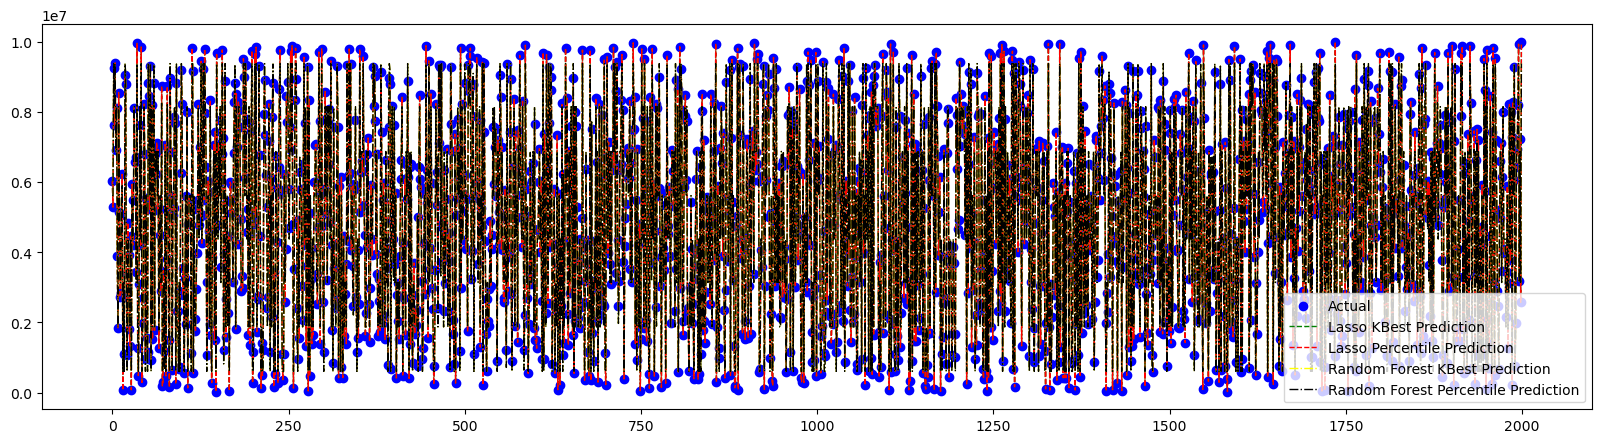

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Misalkan Ridge_predict dan SVR_predict sudah didefinisikan sebelumnya
# Ridge_predict = model_ridge.predict(X_test)
# SVR_predict = model_svr.predict(X_test)

# Mengonversi y_test_price menjadi DataFrame
df_results = pd.DataFrame(y_test_price)

# Menambahkan kolom prediksi
df_results['Lasso KBest Prediction']=Lasso_predict
df_results['Random Forest KBest Prediction']=RF_predict

# Jika ada kolom lain yang perlu ditambahkan
df_results['Lasso Percentile Prediction']=Lasso_predict
df_results['Random Forest Percentile Prediction']=RF_predict

# Menghitung selisih

df_results['Selisih Price Lasso KBest'] = df_results['Lasso KBest Prediction'] - df_results['price']
df_results['Selisih Price RF KBest'] = df_results['Random Forest KBest Prediction'] - df_results['price']

# Menampilkan beberapa data teratas
print(df_results.head())

# Membuat plot
plt.figure(figsize=(20, 5))
data_len = range(len(y_test_price))
plt.scatter(data_len, df_results['price'], label="Actual", color="blue")
plt.plot(data_len, df_results['Lasso KBest Prediction'], label="Lasso KBest Prediction", color="green", linewidth=1, linestyle="dashed")
plt.plot(data_len, df_results['Lasso Percentile Prediction'], label="Lasso Percentile Prediction", color="red", linewidth=1, linestyle="dashed")
plt.plot(data_len, df_results['Random Forest KBest Prediction'], label="Random Forest KBest Prediction", color="yellow", linewidth=1, linestyle="-.")
plt.plot(data_len, df_results['Random Forest Percentile Prediction'], label="Random Forest Percentile Prediction", color="black", linewidth=1, linestyle="-.")

# Menambahkan legenda dan menampilkan plot
plt.legend()
plt.show()

In [65]:
import pickle
best_model = GSCV_RF.best_estimator_

with open('BestModel_REG_GSCV_RF_matplotlib.pkl', 'wb') as f:
    pickle.dump(best_model, f)
print("Model Terbaik berhasil disimpan ke 'BestModel_REG_GSCV_RF_matplotlib.pkl")

Model Terbaik berhasil disimpan ke 'BestModel_REG_GSCV_RF_matplotlib.pkl
